In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [159]:
# Parametersfor the benchmarking
fps=100.0
num_particles=1000
dt=1.0/fps
spatial_resolution=1E-6  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution

0.00021903148058823087


Generating initial x coordinates

In [160]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[2.850e-04 7.510e-04 4.950e-04 1.468e-03 1.548e-03 6.070e-04 3.390e-04
 1.390e-04 5.190e-04 1.440e-04 1.211e-03 4.140e-04 1.567e-03 4.360e-04
 1.462e-03 4.180e-04 1.163e-03 1.689e-03 3.320e-04 6.700e-04 2.490e-04
 1.257e-03 1.670e-03 1.511e-03 1.010e-03 5.500e-04 1.564e-03 2.140e-04
 1.529e-03 1.057e-03 1.144e-03 1.371e-03 1.299e-03 1.656e-03 1.091e-03
 1.322e-03 7.700e-04 9.470e-04 1.407e-03 1.658e-03 1.466e-03 6.250e-04
 6.450e-04 2.730e-04 9.840e-04 7.000e-04 6.380e-04 1.385e-03 9.190e-04
 1.216e-03 7.870e-04 1.310e-04 7.560e-04 1.741e-03 8.590e-04 1.145e-03
 1.632e-03 1.484e-03 7.870e-04 1.330e-03 8.130e-04 2.430e-04 1.651e-03
 9.410e-04 7.940e-04 5.870e-04 8.260e-04 5.820e-04 1.633e-03 1.166e-03
 1.415e-03 1.360e-04 7.070e-04 1.523e-03 1.040e-03 3.330e-04 1.193e-03
 1.123e-03 2.550e-04 3.850e-04 4.890e-04 6.560e-04 1.296e-03 5.000e-06
 8.430e-04 7.940e-04 1.003e-03 3.180e-04 1.646e-03 1.439e-03 1.638e-03
 4.280e-04 6.840e-04 1.132e-03 1.030e-03 1.359e-03 3.570e-04 6.580e-04
 8.390

In [161]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

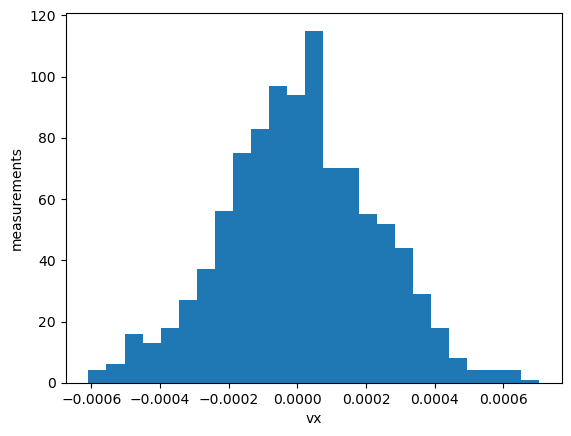

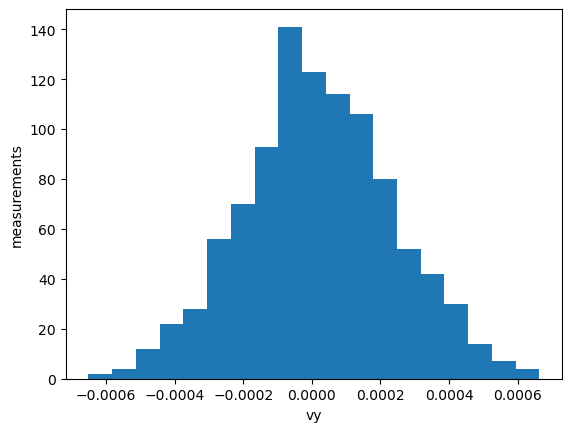

In [162]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 25) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, 19) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

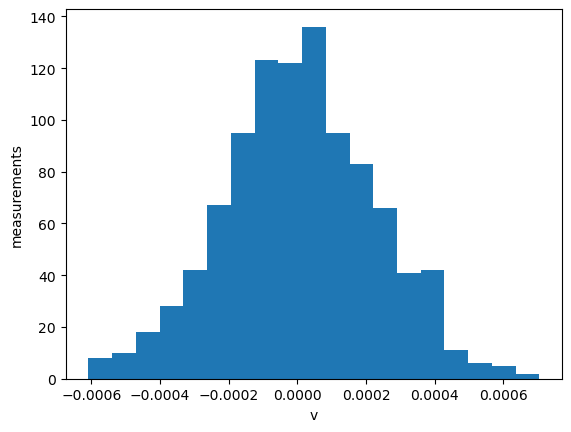

In [163]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 19) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[-1.e-04  3.e-04 -4.e-04 -1.e-04 -2.e-04  0.e+00  0.e+00  4.e-04  0.e+00
 -1.e-04]
[-5.01653446e-05  2.58398597e-04 -4.59326338e-04 -4.46386287e-05
 -1.82923743e-04  2.59178342e-05  8.64232608e-05  3.30115590e-04
 -3.52315347e-05 -4.16408548e-05]
3.261013492154048e-05
0.46299827687048917
46.29982768704891


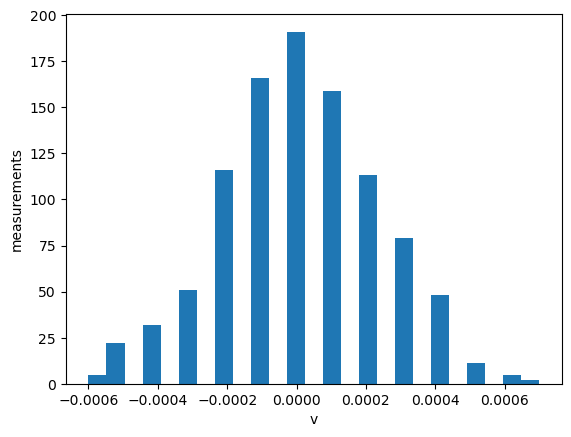

In [164]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, 25) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [165]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

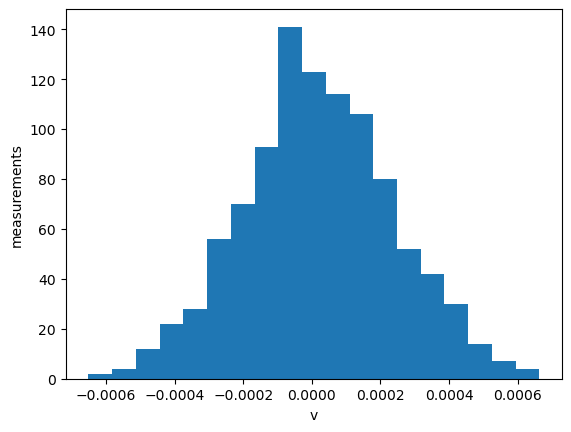

In [166]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 19) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [167]:
# def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
#     dt=1.0/fps
#     init_frame=1
#     final_frame=2
#     dust_diameter=7.14E-6 
#     dust_rho=1510.0
#     mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
#     # print(mass)
#     kb=constants.Boltzmann
#     sigma = np.sqrt(kb*T/mass)
#     # print(sigma)
#     left=0
#     down=0
#     down_SI=down*spatial_resolution
#     left_SI=left*spatial_resolution
#     up_SI=up_border_px*spatial_resolution
#     right_SI=right_border_px*spatial_resolution
#     while init_frame<=final_frame:
#         if init_frame==1:
#             # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
#             unif_x = sts.uniform(left_SI, right_SI-left_SI)
#             sample_x=unif_x.rvs(num_particles)
#             sample_x_in_resol= sample_x/spatial_resolution
#             sample_x_trunc= sample_x_in_resol.astype('int64')
#             sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
#             unif_y = sts.uniform(down_SI, up_SI-down_SI)
#             sample_y=unif_y.rvs(num_particles)
#             sample_y_in_resol= sample_y/spatial_resolution
#             sample_y_trunc= sample_y_in_resol.astype('int64')
#             sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution
#             # Generate a sample of 1000 random velocities from a normal distribution
#             norm_rv = sts.norm(mu, sigma)
#             sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
#             sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
#         # Simulating the motion of the particles for x coordinates
#         x_forward = sample_x_trunc_SI + sample_vx*dt
#         x_forward_in_resol = x_forward / spatial_resolution
#         x_forward_trunc = x_forward_in_resol.astype('int64')
#         x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
#         # Simulating the motion of the particles for y coordinates
#         y_forward = sample_y_trunc_SI + sample_vy * dt
#         y_forward_in_resol = y_forward / spatial_resolution
#         y_forward_trunc = y_forward_in_resol.astype('int64')
#         y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

#         # Calculating restored velocities
#         v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
#         v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
#         # Append the data for the current frame
#         frame_data=[]
#         for j in range(num_particles):
#             # Append the data for the current frame
#             frame_data.append([sample_x_trunc_SI[j], sample_y_trunc_SI[j], j,1,v_restored_x[j],v_restored_y[j], sample_vx[j], sample_vy[j]])
#         x_y_df_prev = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no','frame','vx (restored)','vy (restored)', 'vx', 'vy'])
#         frame_data = []
#         for j in range(num_particles):
#             # Append the data for the current frame
#             frame_data.append([x_forward_SI[j], y_forward_SI[j], j,2,np.nan,np.nan, sample_vx[j], sample_vy[j]])
#         # Create a DataFrame
#         x_y_df_forward = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no','frame','vx (restored)','vy (restored)', 'vx', 'vy'])
#         x_y_df= pd.concat([x_y_df_prev, x_y_df_forward], ignore_index=True)
#     return x_y_df

In [168]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    dt=1.0/fps
    init_frame=1
    final_frame=2
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    frame_full_df=pd.DataFrame()
    while init_frame<=final_frame:
        if init_frame==1:
            # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
            unif_x = sts.uniform(left_SI, right_SI-left_SI)
            sample_x=unif_x.rvs(num_particles)
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
            unif_y = sts.uniform(down_SI, up_SI-down_SI)
            sample_y=unif_y.rvs(num_particles)
            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
            # Generate a sample of 1000 random velocities from a normal distribution
            norm_rv = sts.norm(mu, sigma)
            sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
            sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [169]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
x_y_df


,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,0.001042,0.000281,1,0.0000,-0.0002,0.000012,-0.000148
1,1,0.000708,0.000748,1,0.0000,-0.0003,0.000035,-0.000274
2,2,0.001633,0.001101,1,0.0002,0.0002,0.000290,0.000263
3,3,0.000258,0.000594,1,0.0000,-0.0001,0.000091,-0.000074
4,4,0.000919,0.001440,1,0.0000,-0.0001,0.000003,-0.000051
...,...,...,...,...,...,...,...,...
1995,995,0.000628,0.000018,2,0.0003,0.0003,0.000318,0.000334
1996,996,0.000392,0.000689,2,-0.0001,-0.0003,-0.000075,-0.000256
1997,997,0.001476,0.000818,2,-0.0001,0.0002,-0.000028,0.000208
1998,998,0.000852,0.001535,2,0.0000,-0.0001,0.000049,-0.000024


<BarContainer object of 19 artists>

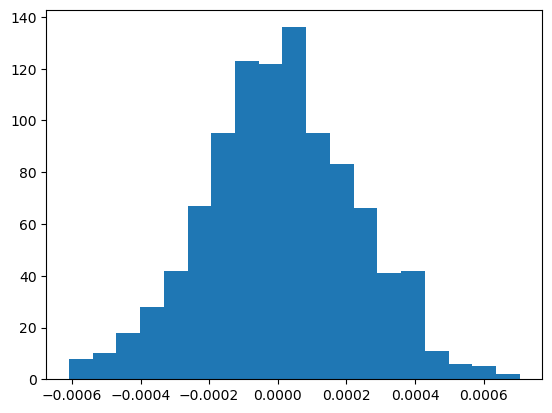

In [170]:
counts_act, bins_act = np.histogram(sample_vx, bins = 19)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act, width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

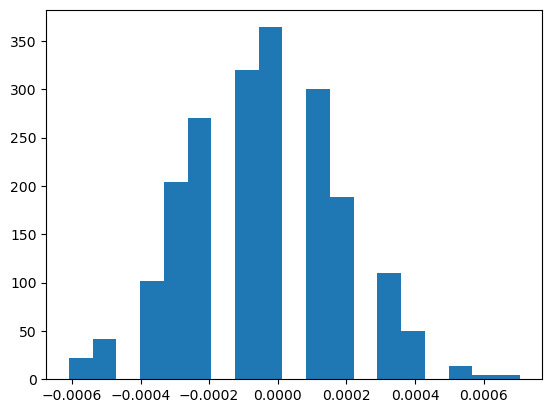

In [171]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

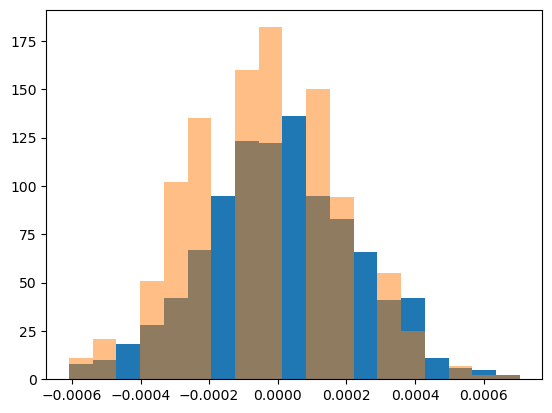

In [172]:
counts, bins = np.histogram(sample_vx, bins = 19)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df[x_y_df['frame'] == 1]['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [173]:
vx_restored=x_y_df[x_y_df['frame']==1]['vx (restored)']
sample_vx=x_y_df[x_y_df['frame']==1]['vx']
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(x_y_df['vx (restored)'])**2/constants.Boltzmann)

0.00022469926568638394
0.00022340894380183134
1040.3705092324494
1052.4227524108499


Function to get the discrepancies

In [174]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [175]:
get_percent_discrepancies(vx_restored,sample_vx)

111.23715370797264

<BarContainer object of 19 artists>

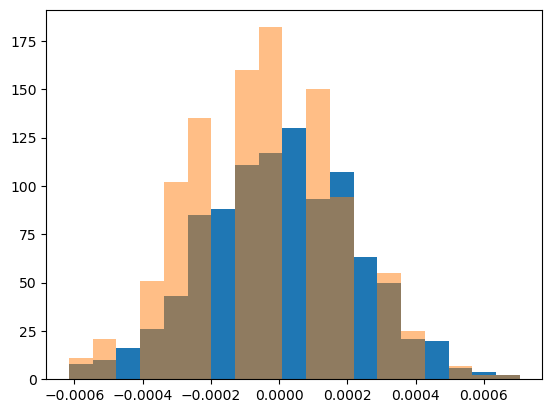

In [176]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
counts, bins = np.histogram(sample_vx, bins = 19)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df[x_y_df['frame'] == 1]['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [177]:
spatial_resolution_arr=np.arange(1E-9,1E-6,1E-8)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))


[1.00e-09 1.10e-08 2.10e-08 3.10e-08 4.10e-08 5.10e-08 6.10e-08 7.10e-08
 8.10e-08 9.10e-08 1.01e-07 1.11e-07 1.21e-07 1.31e-07 1.41e-07 1.51e-07
 1.61e-07 1.71e-07 1.81e-07 1.91e-07 2.01e-07 2.11e-07 2.21e-07 2.31e-07
 2.41e-07 2.51e-07 2.61e-07 2.71e-07 2.81e-07 2.91e-07 3.01e-07 3.11e-07
 3.21e-07 3.31e-07 3.41e-07 3.51e-07 3.61e-07 3.71e-07 3.81e-07 3.91e-07
 4.01e-07 4.11e-07 4.21e-07 4.31e-07 4.41e-07 4.51e-07 4.61e-07 4.71e-07
 4.81e-07 4.91e-07 5.01e-07 5.11e-07 5.21e-07 5.31e-07 5.41e-07 5.51e-07
 5.61e-07 5.71e-07 5.81e-07 5.91e-07 6.01e-07 6.11e-07 6.21e-07 6.31e-07
 6.41e-07 6.51e-07 6.61e-07 6.71e-07 6.81e-07 6.91e-07 7.01e-07 7.11e-07
 7.21e-07 7.31e-07 7.41e-07 7.51e-07 7.61e-07 7.71e-07 7.81e-07 7.91e-07
 8.01e-07 8.11e-07 8.21e-07 8.31e-07 8.41e-07 8.51e-07 8.61e-07 8.71e-07
 8.81e-07 8.91e-07 9.01e-07 9.11e-07 9.21e-07 9.31e-07 9.41e-07 9.51e-07
 9.61e-07 9.71e-07 9.81e-07 9.91e-07]
100


In [178]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution=spatial_resolution_arr[i]
    df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T=mass*np.std(df[df['frame']==1]['vx'])**2/constants.Boltzmann
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

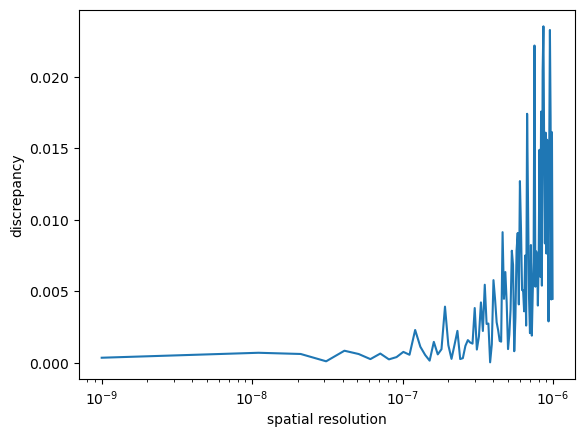

In [179]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('discrepancy')
ax.set_xscale('log')